<a href="https://colab.research.google.com/github/SinaQP/leximood-datamodel/blob/main/LexiMood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('emotion_dataset.csv')
encoder = LabelEncoder()
integer_labels = encoder.fit_transform(df['emotion'])
emotion_labels = encoder.classes_
num_classes = len(emotion_labels)
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

texts = df['text'].values
X_train, X_test, y_train, y_test = train_test_split(
    texts,
    one_hot_labels,
    test_size=0.2,
    random_state=42
)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

VOCAB_SIZE = 15000
MAX_LEN = 100
OOV_TOKEN = "<UNK>"

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
train_padded = pad_sequences(train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')


In [ ]:
import tensorflow as tf

# تعریف پارامترهای مدل
EMBEDDING_DIM = 128
LSTM_UNITS = 128

inputs = tf.keras.Input(shape=(MAX_LEN,))
x = tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_UNITS, return_sequences=True))(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,217,096 (8.46 MB)

 Trainable params: 2,217,096 (8.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_EPOCHS = 15
BATCH_SIZE = 64

history = model.fit(
    train_padded, y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(test_padded, y_test),
    verbose=1
)

Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 539ms/step - accuracy: 0.1746 - loss: 2.0057 - val_accuracy: 0.2524 - val_loss: 1.7981
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 506ms/step - accuracy: 0.2660 - loss: 1.8117 - val_accuracy: 0.5801 - val_loss: 1.3648
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 520ms/step - accuracy: 0.5811 - loss: 1.2190 - val_accuracy: 0.7354 - val_loss: 0.8577
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 503ms/step - accuracy: 0.7619 - loss: 0.6853 - val_accuracy: 0.7864 - val_loss: 0.6381
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 515ms/step - accuracy: 0.8948 - loss: 0.3728 - val_accuracy: 0.8204 - val_loss: 0.5798
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 529ms/step - accuracy: 0.9540 - loss: 0.2086 - val_accuracy: 0.8398 - val_loss: 0.5917
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 543ms/step - accuracy: 0.9770 - loss: 0.1061 - val_accuracy: 0.8495 - val_loss: 0.5541
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 551ms/step - accuracy: 0.9848 - loss: 0.0606 - val_accu

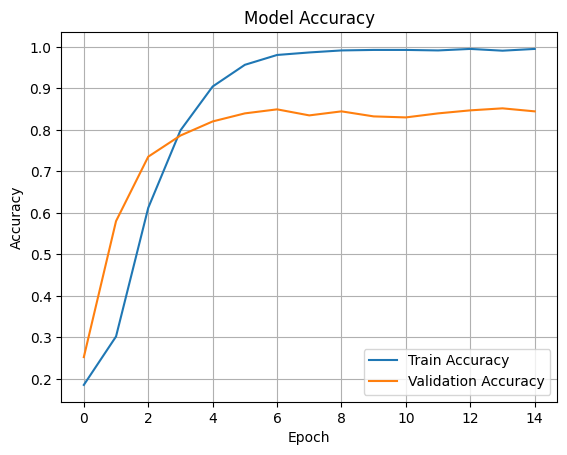

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


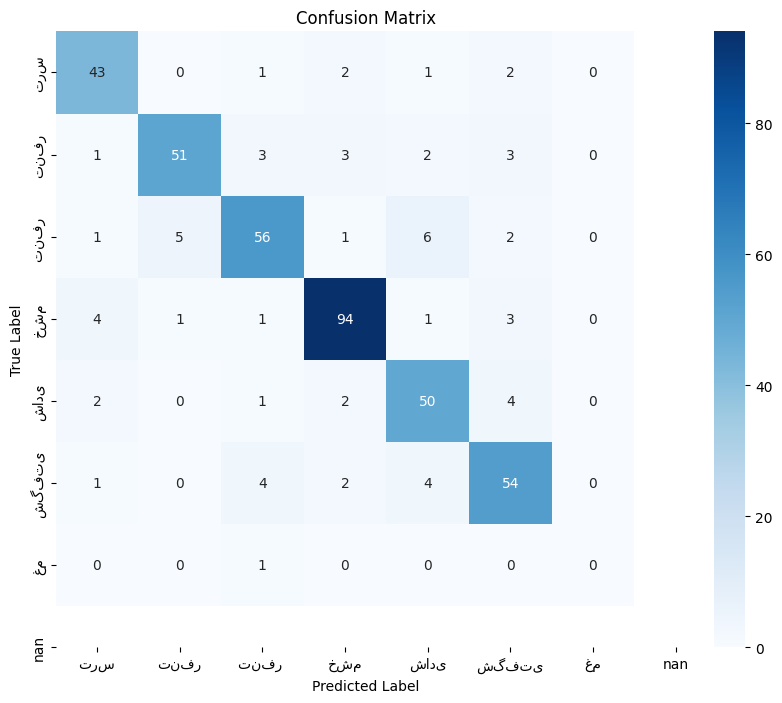

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = model.predict(test_padded)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()